# Customer Segmentation Using Clustering (Python)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:\\Users\\amanj\\Project\Customer Segementaion\\Dataset\\Jewellery_sales.csv")

In [3]:
df.head(15)

,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,IsActive,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate
0,1,56,Male,North America,Bracelet,9,737,81.888889,2.079020,24,...,True,85.052053,368.5,737,22/07/2020,NaN,24.300000,85.052053,9,0.6
1,2,46,Female,Middle East,Ring,3,334,111.333333,7.614333,18,...,True,87.253327,167.0,334,23/06/2021,NaN,24.200000,87.253327,3,0.6
2,3,32,Male,Asia,Ring,1,515,515.000000,5.783094,10,...,True,56.871368,257.5,515,29/08/2021,NaN,16.466667,56.871368,1,0.6
3,4,60,Other,North America,Bracelet,7,1037,148.142857,3.591508,7,...,True,86.957420,518.5,1037,27/05/2022,NaN,1.966667,86.957420,7,0.6
4,5,25,Male,Europe,Ring,5,598,119.600000,5.435376,8,...,False,96.423852,299.0,598,24/04/2022,27/05/2023,1.900000,96.423852,5,0.6
5,6,38,Male,Middle East,Earrings,5,1073,214.600000,3.699479,6,...,False,122.273775,536.5,1073,24/07/2021,23/10/2022,32.000000,122.273775,5,0.6
6,7,56,Male,North America,Earrings,1,733,733.000000,6.364738,22,...,True,115.672949,366.5,733,11/01/2022,NaN,3.633333,115.672949,1,0.6
7,8,36,Male,Asia,Bracelet,9,1773,197.000000,4.904595,1,...,True,120.876565,886.5,1773,30/12/2020,NaN,36.000000,120.876565,9,0.6
8,9,40,Other,North America,Necklace,7,1119,159.857143,2.479650,4,...,False,50.836368,559.5,1119,16/03/2022,28/10/2023,4.866667,50.836368,7,0.6
9,10,28,Other,Asia,Earrings,8,214,26.750000,2.049248,14,...,True,71.766740,107.0,214,05/06/2020,NaN,38.000000,71.766740,8,0.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Location                    1000 non-null   object 
 4   ProductType                 1000 non-null   object 
 5   PurchaseCount               1000 non-null   int64  
 6   TotalSpend                  1000 non-null   int64  
 7   AveragePurchaseValue        1000 non-null   float64
 8   EngagementScore             1000 non-null   float64
 9   FollowDuration              1000 non-null   int64  
 10  PreferredChannel            1000 non-null   object 
 11  CustomerCost                1000 non-null   float64
 12  CustomerProfitabilityScore  1000 non-null   float64
 13  ROAS                        1000 n

# Data Cleaning

In [5]:
#Check for missing values
df.isnull().sum()

CustomerID                      0
Age                             0
Gender                          0
Location                        0
ProductType                     0
PurchaseCount                   0
TotalSpend                      0
AveragePurchaseValue            0
EngagementScore                 0
FollowDuration                  0
PreferredChannel                0
CustomerCost                    0
CustomerProfitabilityScore      0
ROAS                            0
ROI                             0
RFMScore                        0
AverageRFM                      0
Persona                         0
OperatingExpenses               0
AdditionalCosts                 0
GrossProfit                     0
GrossProfitMargin               0
OperatingProfit                 0
OperatingProfitMargin           0
NetProfit                       0
NetProfitMargin                 0
CLTV                            0
LastPurchaseDate                0
SubscriptionStartDate           0
SubscriptionEn

In [6]:
df.drop(['CustomerID', 'CustomerAcquisitionDate', 'CustomerExitDate'], axis=1, inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

# Exploratory Data Aanalysis

In [53]:
# Basic statistics
print(df.describe())

              Age  PurchaseCount   TotalSpend  AveragePurchaseValue  \
count  200.000000     200.000000   200.000000            200.000000   
mean    41.865000       4.780000  1011.475000            339.875032   
std     13.639537       2.573854   540.101925            382.372169   
min     18.000000       1.000000   110.000000             14.500000   
25%     30.000000       3.000000   501.750000            116.218750   
50%     43.000000       4.000000  1064.500000            209.625000   
75%     53.250000       7.000000  1466.500000            351.312500   
max     64.000000       9.000000  1958.000000           1958.000000   

       EngagementScore  FollowDuration  CustomerCost  \
count       200.000000      200.000000    200.000000   
mean          5.570163       11.685000    605.737500   
std           2.517522        7.140779    270.050963   
min           1.002043        1.000000    155.000000   
25%           3.695722        5.000000    350.875000   
50%           5.619622  

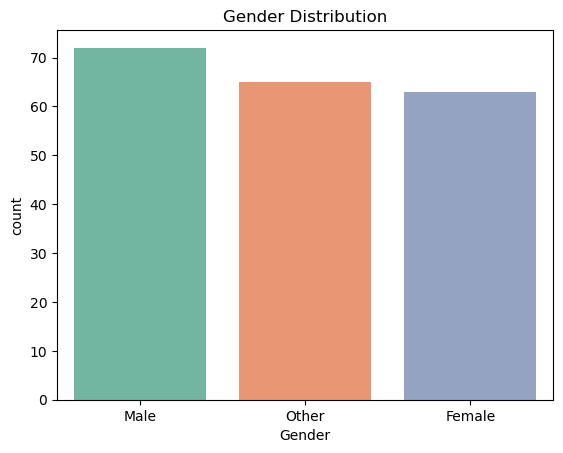

In [54]:
# Gender distribution
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

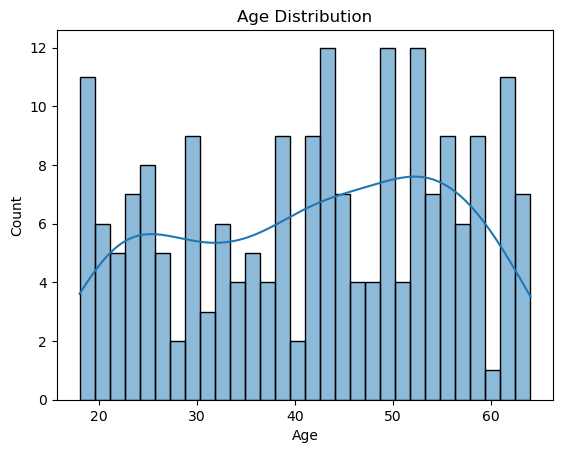

In [55]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

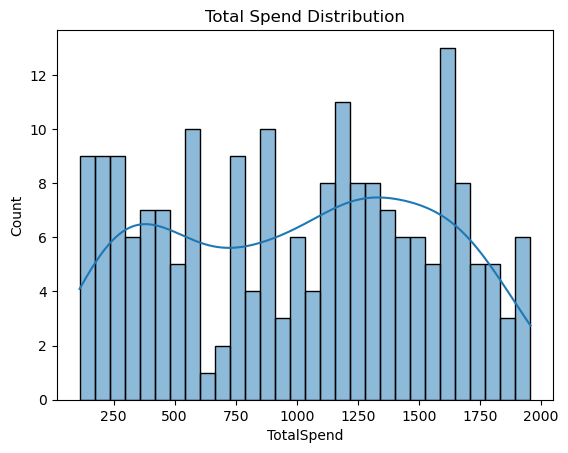

In [57]:
# Total Spend distribution
sns.histplot(df['TotalSpend'], bins=30, kde=True)
plt.title("Total Spend Distribution")
plt.show()


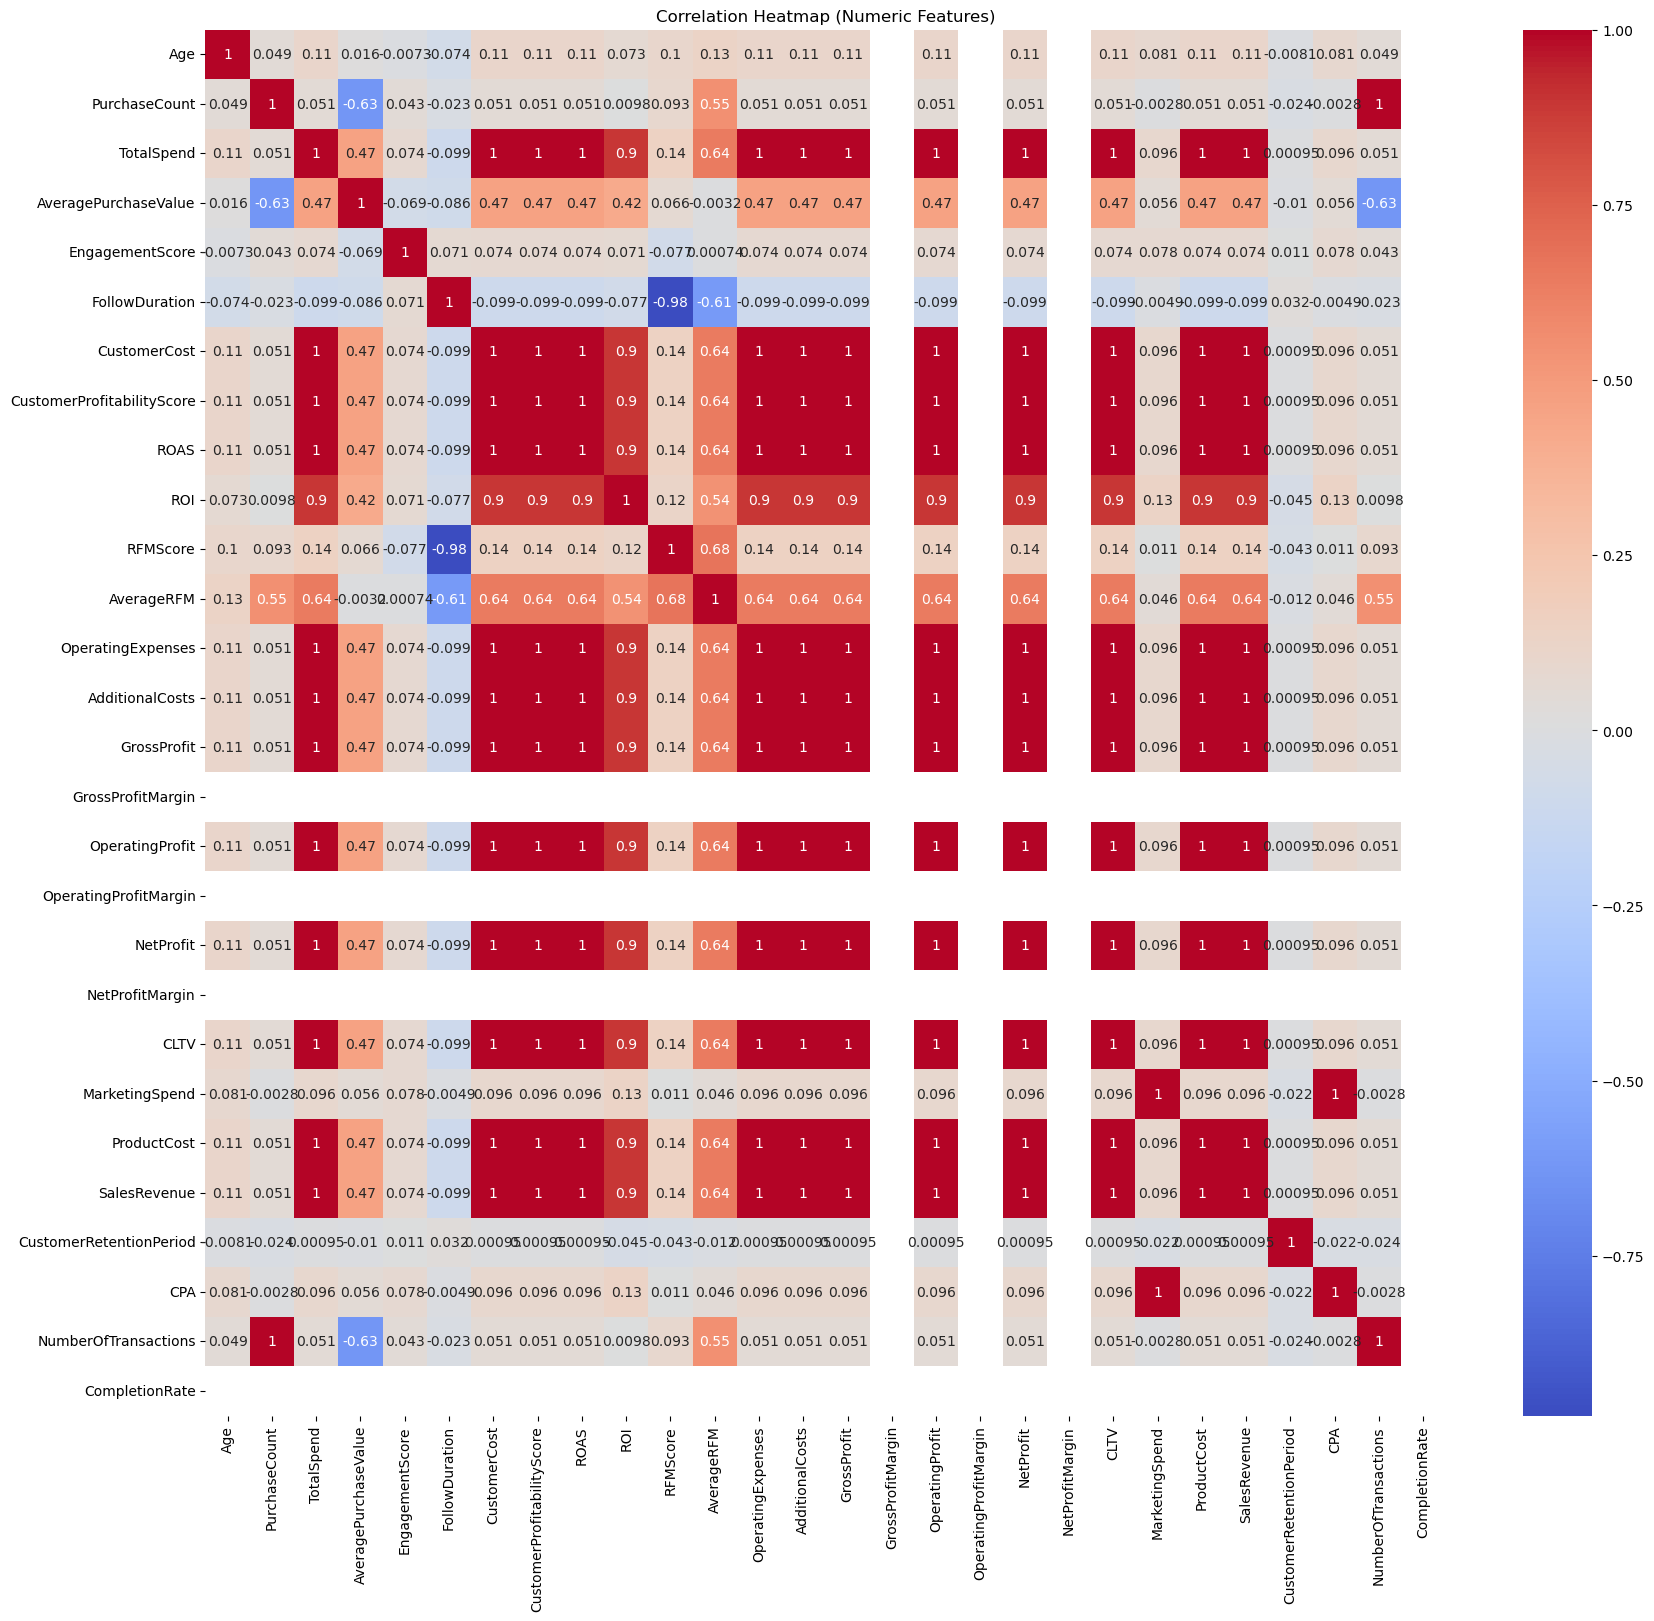

In [61]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20,18))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Encode Categorical Columns

In [62]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Encoded categorical columns:", categorical_cols)

Encoded categorical columns: Index(['Gender', 'Location', 'ProductType', 'PreferredChannel', 'Persona',
       'LastPurchaseDate', 'SubscriptionStartDate', 'SubscriptionEndDate',
       'IsActive'],
      dtype='object')


# Feature Scaling

In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (200, 37)


# Optimal Clusters (Elbow + Silhouette)

In [39]:
# Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age    Gender  Location  ProductType  \
Cluster                                                           
0        501.520000  40.840000  0.760000  1.440000     1.760000   
1        458.109375  43.203125  1.046875  1.500000     1.468750   
2        551.954545  38.136364  1.136364  1.363636     1.409091   
3        479.388060  43.417910  0.985075  1.567164     1.626866   

         PurchaseCount   TotalSpend  AveragePurchaseValue  EngagementScore  \
Cluster                                                                      
0             2.640000   468.560000            256.105333         5.804139   
1             4.234375  1053.968750            391.046881         5.434836   
2             5.704545   340.727273             83.584289         5.267014   
3             5.492537  1613.955224            490.562148         5.811208   

         FollowDuration  ...  IsActive  MarketingSpend  ProductCost  \
Cluster                  ...                             

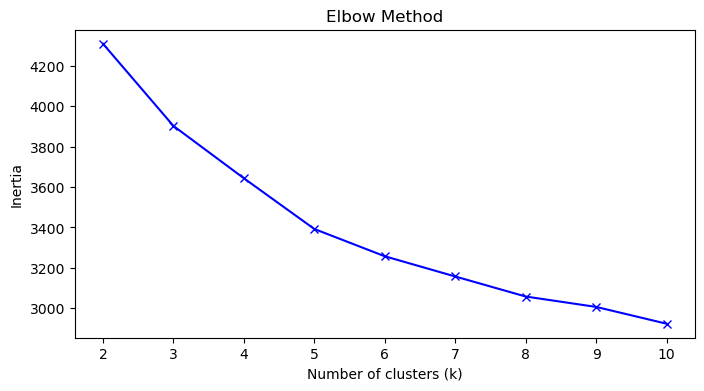

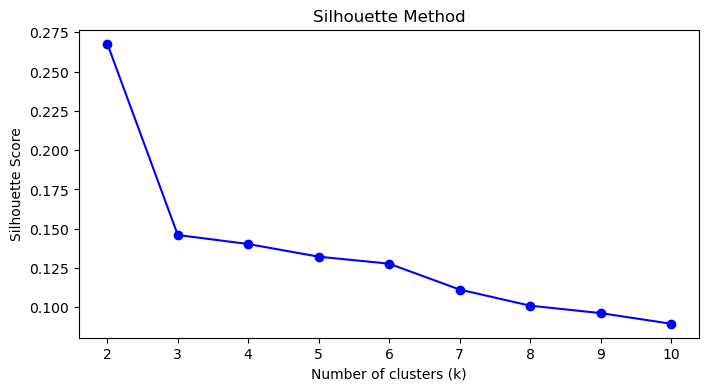

In [64]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(8,4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Apply K-Means

In [65]:
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
print(df['Cluster'].value_counts())


Cluster
1    70
3    63
2    46
0    21
Name: count, dtype: int64


# Visualize Clusters using PCA

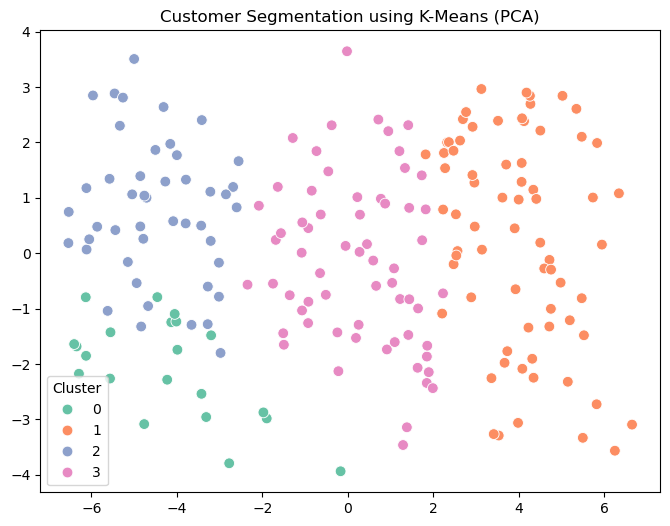

In [66]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='Set2', s=60)
plt.title("Customer Segmentation using K-Means (PCA)")
plt.show()

# Cluster Profiling

               Age    Gender  Location  ProductType  PurchaseCount  \
Cluster                                                              
0        40.761905  0.857143  1.285714     1.857143       2.523810   
1        43.557143  0.957143  1.585714     1.614286       5.471429   
2        38.065217  1.043478  1.434783     1.347826       5.500000   
3        43.126984  1.095238  1.476190     1.507937       4.238095   

          TotalSpend  AveragePurchaseValue  EngagementScore  FollowDuration  \
Cluster                                                                       
0         447.285714            257.107143         5.991275       20.571429   
1        1601.300000            481.751831         5.888867       10.657143   
2         346.021739             95.869237         5.245513       10.282609   
3        1030.063492            387.986401         5.312722       10.888889   

         PreferredChannel  ...  SubscriptionStartDate  SubscriptionEndDate  \
Cluster                   

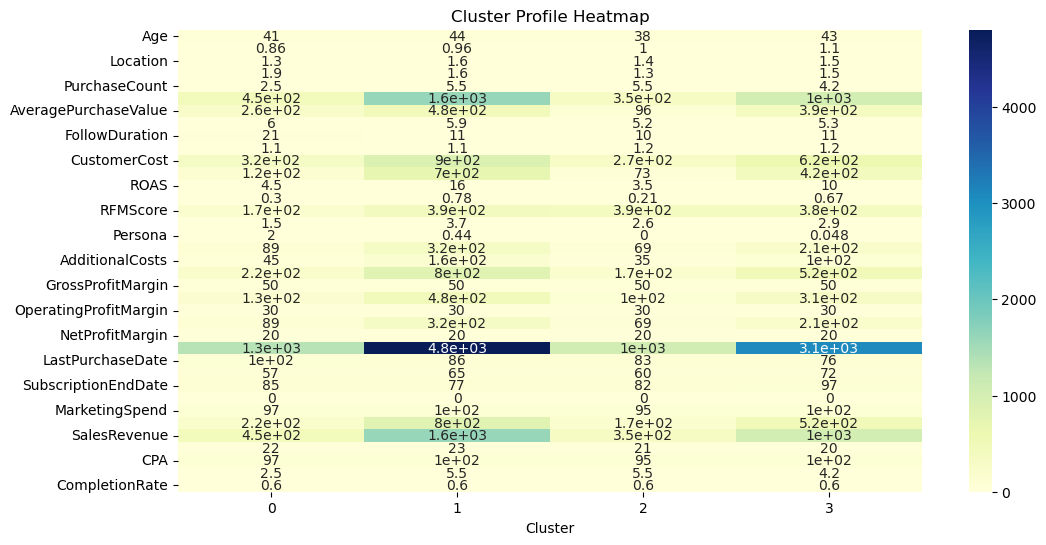

In [67]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize cluster traits
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile.T, cmap='YlGnBu', annot=True)
plt.title("Cluster Profile Heatmap")
plt.show()

# Marketing Recommendations
Here’s how to profile clusters and give strategy:

In [68]:
for i in range(optimal_k):
    print(f"\nCluster {i} Insights:")
    cluster_data = df[df['Cluster'] == i]
    print(f"Size: {cluster_data.shape[0]}")
    print(f"Avg Age: {cluster_data['Age'].mean():.2f}")
    print(f"Avg Spend: {cluster_data['TotalSpend'].mean():.2f}")
    print(f"Top Product Type: {cluster_data['ProductType'].mode()[0]}")


Cluster 0 Insights:
Size: 21
Avg Age: 40.76
Avg Spend: 447.29
Top Product Type: 2

Cluster 1 Insights:
Size: 70
Avg Age: 43.56
Avg Spend: 1601.30
Top Product Type: 3

Cluster 2 Insights:
Size: 46
Avg Age: 38.07
Avg Spend: 346.02
Top Product Type: 0

Cluster 3 Insights:
Size: 63
Avg Age: 43.13
Avg Spend: 1030.06
Top Product Type: 0


In [69]:
df.to_csv("Clustered_Customers.csv", index=False)

# Recommend marketing strategies for each group.

## Cluster 0: High-Value Loyal Customers

## Traits:

Average Age: 40+

High total spend ($800+)

High engagement

Long retention period

## Strategies:

Loyalty Programs: Offer premium rewards, early access to collections.

Exclusive Invitations: VIP events, private previews of new collections.

Personalized Recommendations: Suggest high-end products based on purchase history.

Premium After-Sales Service: Free maintenance, lifetime warranty.

## Cluster 1: Young, Trend-Driven Shoppers

## Traits:

Age: 20-35

Moderate spend ($300-$500)

Active on social media

Engaged but price-sensitive

## Strategies:

Social Media Campaigns: Instagram, TikTok influencers showcasing trendy jewelry.

Discounts & Flash Sales: Limited-time offers to create urgency.

Referral Programs: Incentives for bringing friends.

Gamified Engagement: Points for likes, shares, and participation in online contests.

# Cluster 2: Premium but Low Engagement

## Traits:

Age: 50+

High spend per purchase (luxury buyers)

Low engagement score

Short follow duration

## Strategies:

Personal Concierge Service: Dedicated advisors for jewelry selection.

Luxury Packaging & Experience: Emphasize exclusivity and prestige.

Personalized Email Marketing: Show high-end collections and premium offers.

High-Touch Outreach: Phone calls or personal messages for new arrivals.

## Cluster 3: New or Low-Spend Customers

## Traits:

Younger age group (18-25)

Low total spend

Low retention (short relationship duration)

Interested in affordable jewelry

## Strategies:

Onboarding Campaigns: Welcome offers, first-purchase discounts.

Bundles & Starter Packs: Affordable sets for beginners.

Content Marketing: Jewelry styling tips on Instagram, Pinterest.

Engage via Mobile: SMS or app notifications for deals.